## Exercise 2
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [9]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from os import path, getcwd, chdir


# DO NOT CHANGE THE LINE BELOW. If you are developing in a local
# environment, then grab mnist.npz from the Coursera Jupyter Notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/../tmp2/mnist.npz"
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)

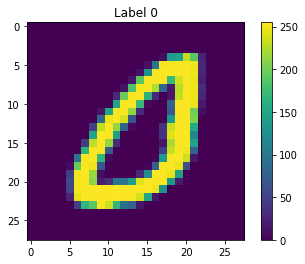

In [10]:
sample = np.random.randint(1,1000)
sample
image = x_train[sample]
# plot the sample
plt.title('Label {label}'.format(label=y_train[sample]))
plt.imshow(image)
plt.colorbar()
plt.show()

In [12]:
image.shape

(28, 28)

In [19]:
# GRADED FUNCTION: train_mnist
def train_mnist():
    # Please write your code only where you are indicated.
    # please do not remove # model fitting inline comments.

    class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if(logs.get('acc')>0.99):
                print("\nReached 99% accuracy so cancelling training!")
                self.model.stop_training = True

    callbacks = myCallback()

    mnist = tf.keras.datasets.mnist

    (x_train, y_train),(x_test, y_test) = mnist.load_data(path=path)
    x_train = x_train/255.0
    x_test = x_test/255.0
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # model fitting
    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks]
    )
    # model fitting
    return history.epoch, history.history['acc'][-1]

In [20]:
train_mnist()

Epoch 1/10
60000/60000 [==============================] - 17s 283us/sample - loss: 0.2021 - acc: 0.9402
Epoch 2/10
60000/60000 [==============================] - 17s 277us/sample - loss: 0.0800 - acc: 0.9761
Epoch 3/10
60000/60000 [==============================] - 17s 285us/sample - loss: 0.0528 - acc: 0.9836
Epoch 4/10
60000/60000 [==============================] - 17s 284us/sample - loss: 0.0362 - acc: 0.9883
Epoch 5/10
59808/60000 [============================>.] - ETA: 0s - loss: 0.0267 - acc: 0.9914
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 16s 263us/sample - loss: 0.0268 - acc: 0.9913


([0, 1, 2, 3, 4], 0.99135)

In [4]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook